# A Customer Churn Prediction using Pearson Correlation Function and naive bayes Algorithm for Telecommunication Industry

# 1-Importing libraries and dataset

In [1]:
#Importation des librairies necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *
from pandas import read_csv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [2]:
# Chargement des données
df=pd.read_csv('Churn.csv',na_values='?')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 1-Data preparation

In [3]:
df.isnull().sum().sum()

0

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###### Pas de valeur manquante ou bien nulle , on a pas besoin d'effectuer l'imputation

## Analyse statistique

In [5]:
#Remplacez les colonnes de texte par des entiers.
#Les colonnes ci-dessous incluent des valeurs de texte similaires, je les ai donc modifiées une fois.
df1=df
df1.gender = [1 if each == "Male" else 0 for each in df1.gender]

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df1[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df1[item]]



In [6]:
#CONTARCT
df1["Contract"].replace(["Month-to-month","Two year","One year"],[0,1,2],inplace = True)
df1["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [7]:
df1["InternetService"].replace(["Fiber optic","DSL","No"],[0,1,2],inplace= True)

In [8]:
#PAYMENT METHOD
df1["PaymentMethod"].replace(["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"],[0,1,2,3],inplace =True)

In [9]:
pd.to_numeric(df1['MonthlyCharges'])


0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

###### la valeur 489eme de la colonne TotalCharges et un espace qui ne peut pas etre transformer en une valeur numerique, on le remplace par la 0

In [10]:
df1['TotalCharges'] = df1['TotalCharges'].replace([' '],'0')

In [11]:
df1.head(489
    )

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,-1,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,2,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,-1,1,1,...,1,1,0,0,2,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,5949-XIKAE,0,0,1,1,8,1,0,0,0,...,0,0,1,0,0,1,0,83.55,680.05,1
485,7971-HLVXI,1,0,1,1,72,1,1,0,0,...,0,0,0,1,1,1,3,84.50,6130.85,0
486,9094-AZPHK,0,0,0,0,15,1,1,0,0,...,0,0,1,1,0,1,0,100.15,1415,0
487,3649-JPUGY,1,0,0,0,72,1,1,1,0,...,1,1,1,1,1,1,2,88.60,6201.95,0


In [12]:
pd.to_numeric(df1['MonthlyCharges'])


0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [13]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',na_values='?')


### 1 pour Male et Yes.
### 0 pour Female et No.
### -1 pour tout autre chose.

In [14]:
#Générez des statistiques descriptives
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.325004,0.777084,0.069999,0.128212,0.127219,0.073548,0.167684,0.171234,0.658952,0.592219,1.315633,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.778877,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507,0.801943,0.491457,1.148907,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,1.000000


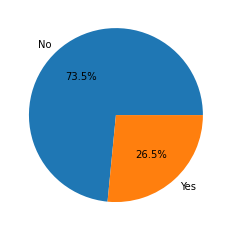

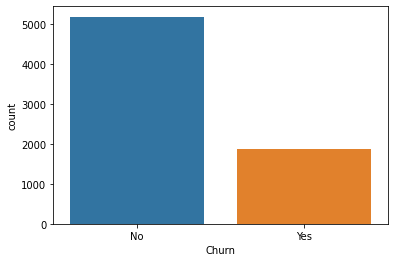

In [15]:

data = df.groupby(['Churn']).size()
plt.pie(x=data, autopct="%.1f%%",labels=df['Churn'].unique())
plt.show()
sns.countplot(x="Churn",data=df);

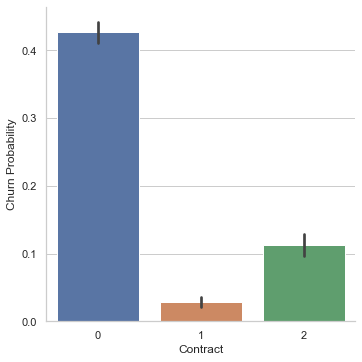

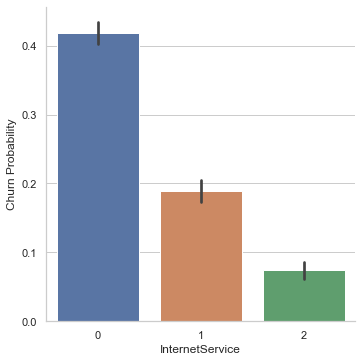

In [16]:
sns.set(style="whitegrid")
g1=sns.catplot(x="Contract", y="Churn", data=df1,kind="bar")
g1.set_ylabels("Churn Probability")

g2=sns.catplot(x="InternetService", y="Churn", data=df1,kind="bar")
g2.set_ylabels("Churn Probability")

###### Contract: 0 pour month to month  1 pour two years 2 pour one year
###### InternetService:0 pour Fibre optique 1 pour ADSL 2 pour Rien

###### Les personnes ayant une ancienneté inférieure et des frais mensuels plus élevés ont tendance à se désister davantage. Aussi comme vous pouvez le voir ci-dessous; avoir un contrat mensuel et un Internet par fibre optique ont un effet vraiment énorme sur la probabilité de désabonnement

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

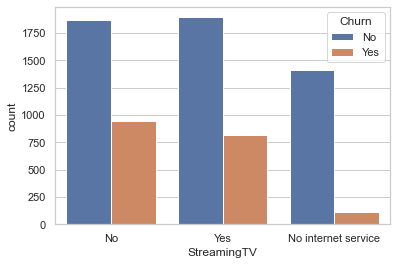

In [17]:
plt.figure()
sns.countplot(x="StreamingTV", hue="Churn", data=df)

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

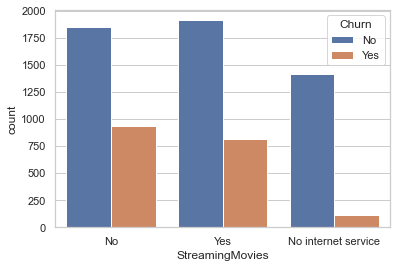

In [18]:
plt.figure()
sns.countplot(x="StreamingMovies", hue="Churn", data=df)

<AxesSubplot:xlabel='Contract', ylabel='count'>

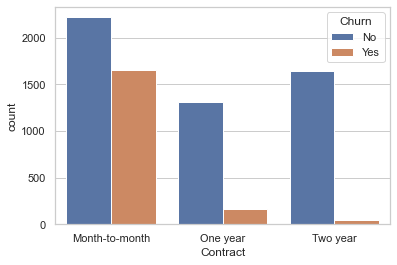

In [19]:
plt.figure()
sns.countplot(x="Contract", hue="Churn", data=df)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

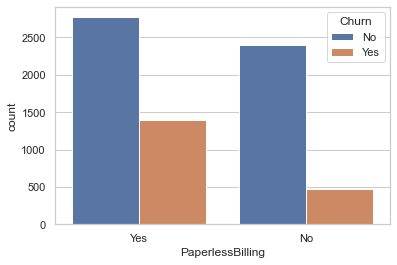

In [20]:
plt.figure()
sns.countplot(x="PaperlessBilling", hue="Churn", data=df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

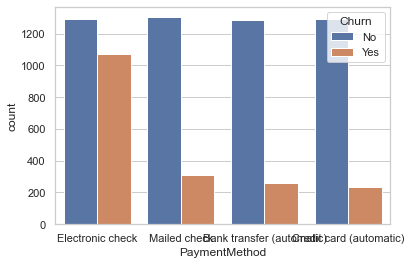

In [21]:
plt.figure()
sns.countplot(x="PaymentMethod", hue="Churn", data=df)

# 2-Data processing

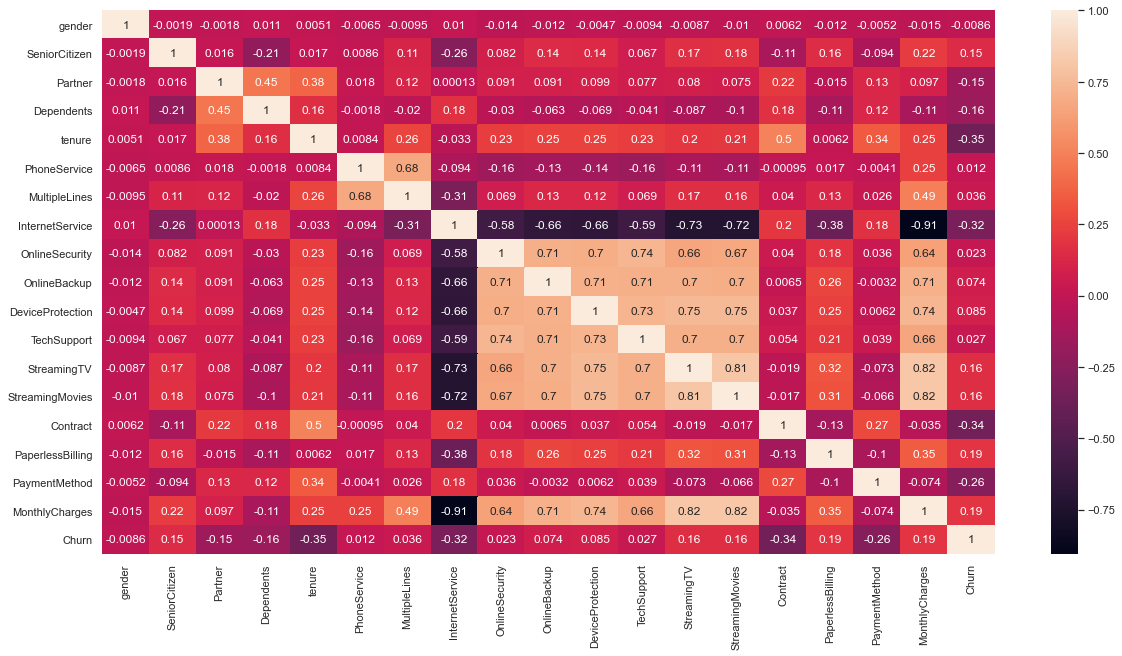

In [19]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr(method='pearson')
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(df1,show_chart=True)

In [20]:
show_correlations(df1, show_chart=False)["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
StreamingTV         0.164673
StreamingMovies     0.163220
SeniorCitizen       0.150889
DeviceProtection    0.084654
OnlineBackup        0.074205
MultipleLines       0.036310
TechSupport         0.027037
OnlineSecurity      0.023309
PhoneService        0.011942
gender             -0.008612
Partner            -0.150448
Dependents         -0.164221
PaymentMethod      -0.262818
InternetService    -0.316846
Contract           -0.341504
tenure             -0.352229
Name: Churn, dtype: float64

<Figure size 1440x720 with 0 Axes>

In [21]:
df2=df1
del df2['customerID']
del df2['tenure']
del df2['Contract']
del df2['InternetService']
del df2['PaymentMethod']
del df2['Dependents']
del df2['Partner']
del df2['gender']

In [22]:
df2.head(3)

,SeniorCitizen,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,-1,0,1,0,0,0,0,1,29.85,29.85,0
1,0,1,0,1,0,1,0,0,0,0,56.95,1889.5,0
2,0,1,0,1,1,0,0,0,0,1,53.85,108.15,1


In [23]:
#feature extraction(ACP)
from sklearn.decomposition import PCA
# define a matrix

array = df2.values
X = array[:,0:13]

X

array([[0, 0, -1, ..., 29.85, '29.85', 0],
       [0, 1, 0, ..., 56.95, '1889.5', 0],
       [0, 1, 0, ..., 53.85, '108.15', 1],
       ...,
       [0, 0, -1, ..., 29.6, '346.45', 0],
       [1, 1, 1, ..., 74.4, '306.6', 1],
       [0, 1, 0, ..., 105.65, '6844.5', 0]], dtype=object)

In [24]:
# create the PCA instance
pca = PCA(13)
pca

PCA(n_components=13)

In [25]:
pca.fit(X)


PCA(n_components=13)

In [26]:
#Les composantes principale: Vecteurs propores
C=pca.components_
print(C)

#Proportions de variance associées aux axes: les valeurs propores
propvar=pca.explained_variance_
print(propvar)

A = pca.transform(X)
print(A)

[[ 1.67524404e-05  1.47731901e-05  1.16851345e-04  1.50331434e-04
   1.74994548e-04  1.77595484e-04  1.54684204e-04  1.78729004e-04
   1.80024221e-04  3.43849527e-05  8.64441407e-03  9.99962541e-01
  -3.86240011e-05]
 [ 3.25307468e-03  2.94971916e-03  8.22056602e-03  1.30967698e-02
   1.53702049e-02  1.62612735e-02  1.38465603e-02  2.05997905e-02
   2.04588566e-02  7.05454133e-03  9.99006616e-01 -8.65418831e-03
   8.21087710e-03]
 [-2.20627433e-02 -2.23942581e-01 -4.34537883e-01  4.10827261e-01
   3.58768151e-01  3.60795481e-01  4.13058293e-01  2.80859706e-01
   2.86184635e-01  9.17046726e-03 -2.97277320e-02 -4.39808478e-05
  -2.24492942e-02]
 [ 1.70660669e-01 -1.75575503e-01 -4.22823356e-01 -4.13542863e-01
  -1.64664698e-01 -3.18704238e-02 -2.85137671e-01  2.51379342e-01
   2.45523917e-01  5.18597443e-01 -4.48824373e-04  9.82988335e-05
   2.97321583e-01]
 [-9.36540808e-02 -6.40978317e-02 -3.54644892e-01 -2.17055376e-01
  -4.00057947e-01  5.59655676e-02 -1.17557177e-01  1.56669253e-01


# 3-Naive Bayes Model

In [27]:
X= df2.iloc[:,1:12].values
y= df2['Churn']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [29]:
import mpmath
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [30]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [31]:
expected = y_val
predicted = model.predict(X_val)

In [32]:
metrics.classification_report(expected, predicted)

'              precision    recall  f1-score   support\n\n           0       0.88      0.72      0.79      1298\n           1       0.48      0.72      0.58       463\n\n    accuracy                           0.72      1761\n   macro avg       0.68      0.72      0.69      1761\nweighted avg       0.78      0.72      0.74      1761\n'

In [33]:
metrics.confusion_matrix(expected, predicted)

array([[941, 357],
       [129, 334]])

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_val,predicted)

0.7240204429301533

In [37]:
#Gaussian Kernel
from sklearn.svm import SVC
svclassifier1 = SVC(kernel='rbf')
svclassifier1.fit(X_train, y_train)

SVC()

In [39]:
y_pred2 = svclassifier1.predict(X_val)

In [42]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svclassifier1.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svclassifier1.score(X_val, y_val)))

Accuracy of SVM classifier on training set: 0.73
Accuracy of SVM classifier on test set: 0.74


In [43]:
print('test_score = ', svclassifier1.score(X_val, y_val))

test_score =  0.7370812038614424


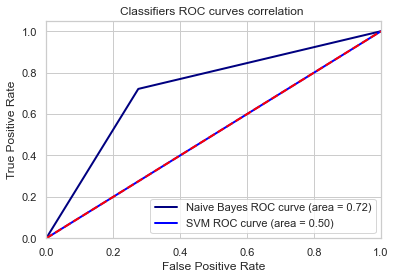

In [47]:
from sklearn.metrics import roc_curve, auc
y_pred_dt = model.predict(X_val)
y_pred_rf=svclassifier1.predict(X_val)
#y_pred_naive=dtc.predict(X_test)
fpr1, tpr1, threshold1 = roc_curve(y_val, y_pred_dt) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_val, y_pred_rf) 
roc_auc2 = auc(fpr2, tpr2)



plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='Naive Bayes ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='SVM ROC curve (area = %0.2f)'% roc_auc2)


plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves correlation ') 
plt.legend(loc = "lower right")
plt.show()